# Vnmrjpy documentation draft

## TODO

1.make general data array [rcvrs, read, phase, slice/phase2, echo*time] 

2.function needed to transform arbitrary image data into FSL compatible format eg.:dim1 is top to bottom ? check this

In [181]:
from IPython.display import HTML

In [182]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [189]:
import pygraphviz


G = pygraphviz.AGraph(name='pyrecon path' ,directed=True, strict=False)

# title
#G.label = 'Pyrecon flowchart'
#G.bb = [0,10,0,10]
# vnmrj file types
G.node_attr['shape'] = 'box'
G.node_attr['style'] = 'filled'
G.node_attr['fillcolor'] = 'darkolivegreen3'
G.add_node('fid',label='.fid')
G.add_node('fdf',label='.fdf')
G.add_node('nifti',label='.nii')
G.add_node('pp',label='.procpar')
# data stages
G.node_attr['fillcolor'] = 'gold'
G.add_node('K',label='K-space')
G.add_node('I',label='Image space')
# numpy data stages
G.node_attr['shape'] = 'box'
G.node_attr['color'] = 'black'
G.node_attr['fillcolor'] = 'coral3'
G.add_node('np.fid',label='nump.ndarray([blocks, np*traces])')
G.add_node('np.kspace',label='nump.ndarray([rcvrs, phase, read, slice, echo*time])')
#G.add_node('np.imgspace',label='nump.ndarray([rcvrs, phase, read, slice, echo*time])')
G.add_node('np.nifti',label='nump.ndarray([phase, read, slice, echo*time])')


# classes, methods
G.node_attr['fillcolor'] = 'azure3'
G.node_attr['shape'] = 'box'
G.node_attr['color'] = 'black'
G.add_node('KM',label='kSpaceMaker')
G.add_node('IM',label='imgSpaceMaker')
G.add_node('FR',label='fidReader')
G.add_node('PR',label='procparReader')
G.add_node('NW',label='niftiWriter')
G.add_node('FW',label='fdfWriter')

# making connections
G.edge_attr['len'] = 1
series = ['fid','FR','np.fid','KM','np.kspace','IM','np.nifti']
for k in range(0,len(series)-1):
    G.add_edge(series[k], series[k+1])
G.add_edge('np.nifti','NW')
G.add_edge('np.nifti','FW')
G.add_edge('FW','fdf')
G.add_edge('NW','nifti')


# finishing edges
G.add_edge('pp','PR')
G.add_edge('PR','FR')
G.add_edge('np.kspace','K',arrowhead='none')
G.add_edge('np.nifti','I',arrowhead='none')

# drawing
G.layout('dot')
G.write('flowchart.dot')
G.draw('flowchart.png')

## Pyrecon flowchart

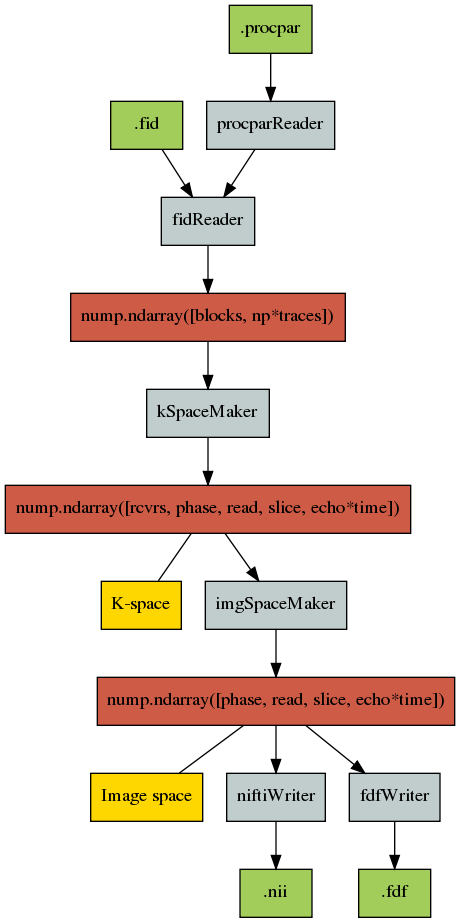

In [190]:
from IPython.display import Image
Image(filename='flowchart.png')